### 1.4.10 Histograms in OpenCV

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

[[ 136.   83.   79.  128.  132.  178.  176.  164.  166.  194.  229.  241.
   224.  247.  240.  275.  284.  280.  288.  327.  299.  314.  363.  348.
   360.  354.  350.  394.  387.  393.  377.  385.  441.  455.  438.  442.
   429.  451.  422.  489.  511.  483.  482.  503.  495.  477.  499.  503.
   527.  529.  529.  538.  554.  556.  556.  580.  594.  576.  541.  631.
   594.  640.  618.  633.  630.  653.  616.  662.  624.  661.  611.  640.
   604.  630.  682.  663.  656.  689.  670.  741.  788.  742.  677.  721.
   714.  672.  669.  713.  665.  665.  678.  681.  699.  718.  726.  733.
   809.  778.  832.  839.  864.  929.  934.  931.  989. 1025. 1013. 1119.
  1093. 1095. 1077. 1076. 1091. 1068. 1090. 1078. 1122. 1060. 1081. 1106.
  1117. 1098. 1083. 1181. 1139. 1168. 1190. 1159. 1201. 1201. 1215. 1253.
  1297. 1324. 1315. 1336. 1356. 1321. 1328. 1391. 1429. 1360. 1359. 1456.
  1496. 1548. 1492. 1393. 1524. 1514. 1595. 1605. 1684. 1745. 1778. 1749.
  1757. 1804. 1868. 1996. 1984. 2109. 

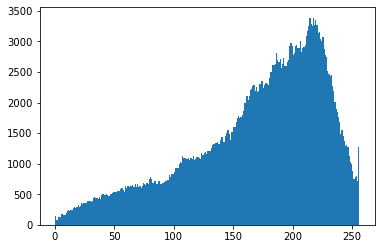

In [12]:
img = cv2.imread('C:/Users/wodlf/OpenCV21/im.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])
print(np.transpose(hist))
hist = np.bincount(img.ravel(),minlength=256)

plt.hist(img.ravel(),256,[0,256]);
plt.show()
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

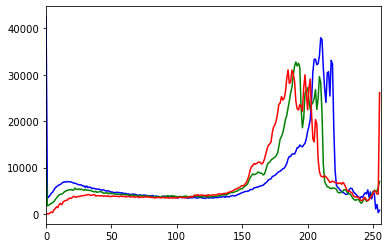

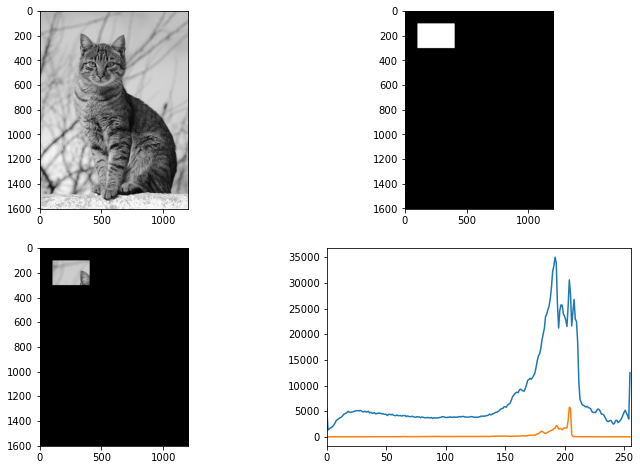

In [15]:
img = cv2.imread('C:/Users/wodlf/OpenCV21/cat.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

img = cv2.imread('C:/Users/wodlf/OpenCV21/cat.jpg',0)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.figure(figsize=(12,8))
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

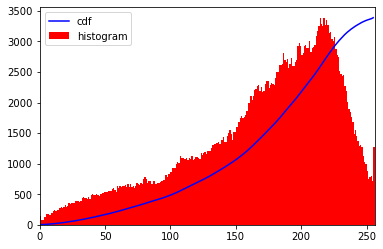

In [17]:
img = cv2.imread('C:/Users/wodlf/OpenCV21/im.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

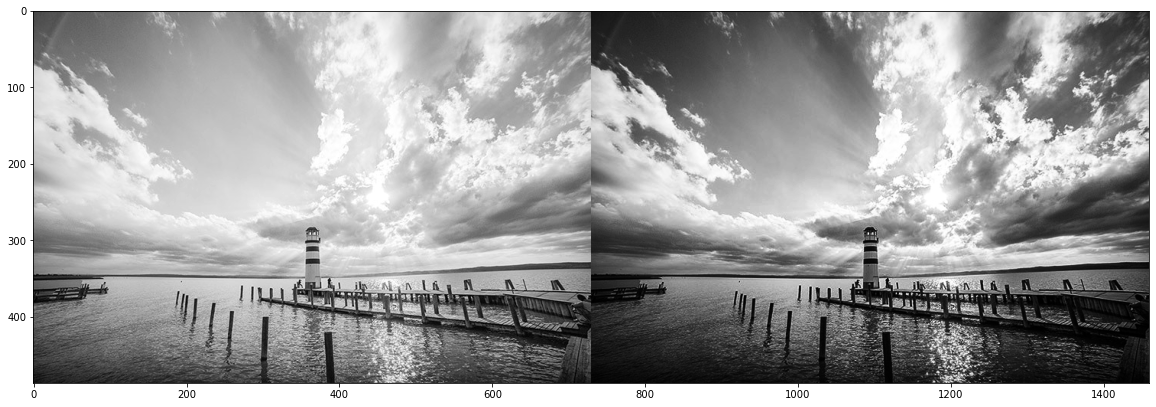

In [25]:
img = cv2.imread('C:/Users/wodlf/OpenCV21/im.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ))
cv2.imwrite('res.png',res)
plt.figure(figsize=(20,20))
plt.imshow(res,"gray")
plt.show()